In [16]:
from PIL import Image
from skimage import io
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpi
import mahotas
import os
import pandas as pd

## Creating dataset

In [57]:
count_channels = 6
name_files = [x for x in os.listdir('./') if '.tif' in x] 
images = []
for name_file in name_files:
    images.extend(io.imread(name_file))
    #extend

In [116]:
channels = []
for i in range(1, count_channels + 1):
    channels.extend([i]*len(name_files))

In [117]:
np.shape(images)

(204, 652, 454)

In [124]:
data = {'name_file': name_files * count_channels, 
             'year': [int(x[:4]) for x in name_files] * count_channels,
           'mounth': [int(x[5:7]) for x in name_files] * count_channels,
          'channel': channels,
            'image': images}

In [125]:
df = pd.DataFrame(data)

In [127]:
#with pd.option_context('display.max_rows', None, 'display.max_columns', None):
df

,name_file,year,mounth,channel,image
0,2019_01.tif,2019,1,1,"[[762, 732, 703, 698, 689, 722, 755, 780, 781,..."
1,2019_05.tif,2019,5,1,"[[951, 887, 845, 827, 836, 873, 913, 978, 993,..."
2,2019_05_0510.tif,2019,5,1,"[[1303, 1231, 1177, 1146, 1155, 1214, 1269, 13..."
3,2019_06.tif,2019,6,1,"[[1889, 1804, 1736, 1659, 1684, 1754, 1818, 19..."
4,2019_07.tif,2019,7,1,"[[2017, 2010, 1991, 1959, 1958, 1987, 2042, 21..."
...,...,...,...,...,...
199,2023_05.tif,2023,5,6,"[[425, 380, 355, 361, 360, 341, 317, 336, 424,..."
200,2023_05_0510.tif,2023,5,6,"[[298, 247, 229, 223, 249, 270, 232, 239, 314,..."
201,2023_06.tif,2023,6,6,"[[1450, 1549, 1553, 1526, 1461, 1414, 1445, 14..."
202,2023_08.tif,2023,8,6,"[[700, 623, 573, 550, 540, 543, 559, 586, 617,..."


## Show images

In [103]:
image = io.imread("2021_09.tif")

In [13]:
np.shape(image)

(6, 652, 454)

In [28]:
# np.shape(image.reshape(652,454,6)[:,:,2])

(652, 454)

In [34]:
# img = Image.fromarray(image.reshape(652,454,6)[:,:,1])

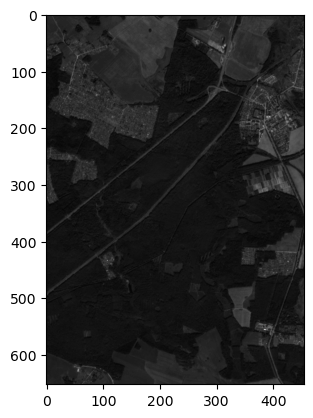

In [73]:
plt.imshow(image[1,::],cmap='gray')

<Figure size 640x480 with 0 Axes>

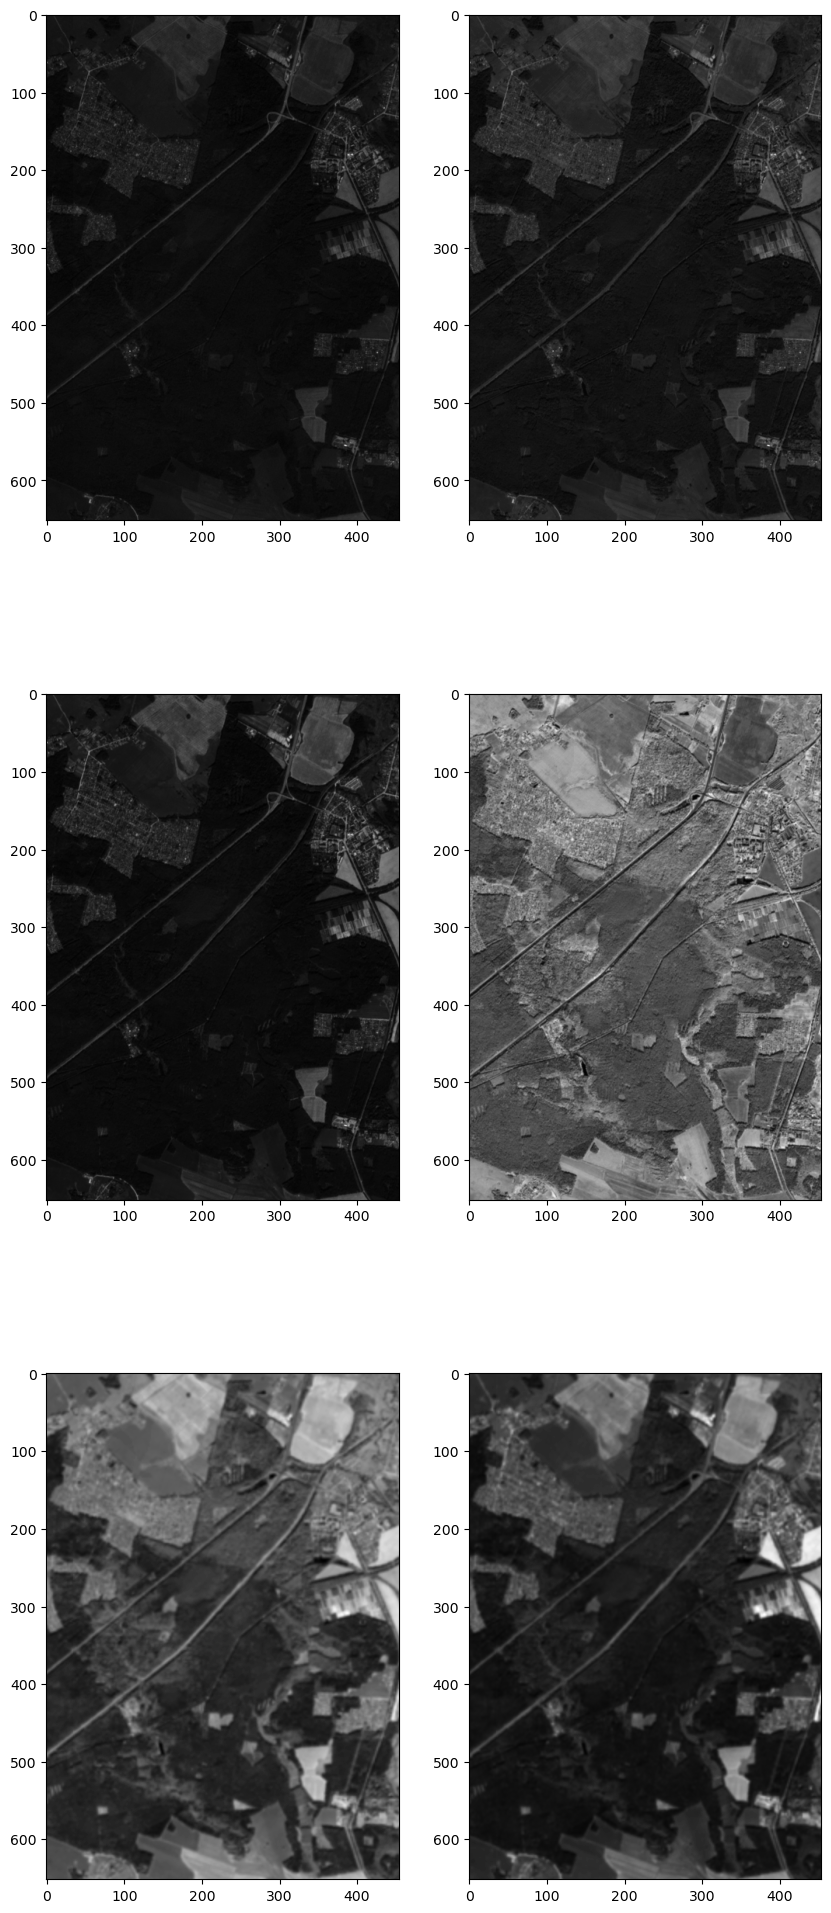

In [98]:
plt.figure()
num_rows=3
num_cols=2
#subplot(r,c) provide the no. of rows and columns
f, axarr = plt.subplots(figsize=(10,25),nrows=num_rows, ncols=num_cols) 

# use the created array to output your multiple images. In this case I have stacked 4 images vertically
for i in range(num_rows):
    for j in range(num_cols):
        axarr[i,j].imshow(image[i*num_cols+j,::],cmap='gray')